In [ ]:
Link to the paper using student t-test (Figure 1): https://pmc.ncbi.nlm.nih.gov/articles/PMC9060471/#:~:text=Interestingly%2C%20oleic%20acid%2Dactivated%20TLX,the%20progeny%20toward%20neuronal%20lineage.

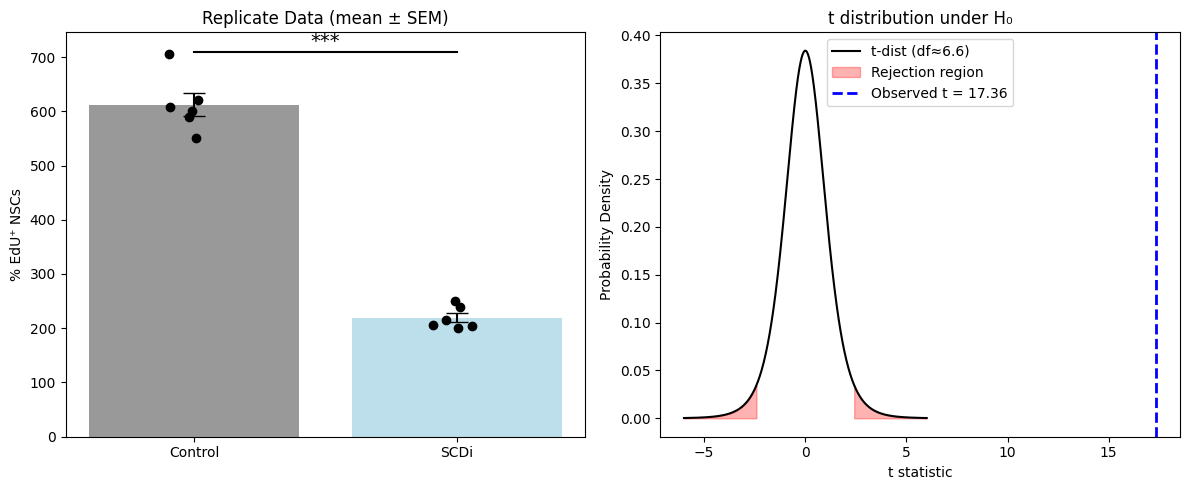

Control %EdU+: [705 590 607 620 550 600]
SCDi %EdU+:   [250 205 200 215 206 240]
Observed t = 17.36, df ≈ 6.6, p = 0.0000
Critical t (±): ±2.40
Significance label: ***


In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# -------------------------------
# Input EdU+ cell counts - example
control_counts = np.array([705, 590, 607, 620, 550, 600])   # EdU+ cells per replicate
scdi_counts    = np.array([250, 205, 200, 215, 206, 240])

# -------------------------------
# Run Welch’s t-test
# -------------------------------
t_stat, p_val = stats.ttest_ind(control_counts, scdi_counts, equal_var=False)

# Degrees of freedom (Welch–Satterthwaite)
sx2 = np.var(control_counts, ddof=1)
sy2 = np.var(scdi_counts, ddof=1)
nx, ny = len(control_counts), len(scdi_counts)
df = (sx2/nx + sy2/ny)**2 / ((sx2**2)/(nx**2*(nx-1)) + (sy2**2)/(ny**2*(ny-1)))

# Critical t-value
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df)

# Function to annotate significance
def get_sig_label(p):
    if p <= 0.001:
        return "***"
    elif p <= 0.01:
        return "**"
    elif p <= 0.05:
        return "*"
    else:
        return "ns"

sig_label = get_sig_label(p_val)

# -------------------------------
# Plotting
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Bar + scatter
means = [np.mean(control_counts), np.mean(scdi_counts)]
sems  = [stats.sem(control_counts), stats.sem(scdi_counts)]
groups = ["Control", "SCDi"]

axes[0].bar(groups, means, yerr=sems, capsize=8,
            color=["gray","lightblue"], alpha=0.8)

# Jitter scatter points
x_jitter_control = np.random.normal(0, 0.05, size=nx)
x_jitter_scdi    = np.random.normal(0, 0.05, size=ny)
axes[0].scatter(0 + x_jitter_control, control_counts, color="black", zorder=10)
axes[0].scatter(1 + x_jitter_scdi,    scdi_counts,    color="black", zorder=10)

# Add significance marker
y_max = max(np.max(control_counts), np.max(scdi_counts)) + 5
axes[0].plot([0, 1], [y_max, y_max], color="black")
axes[0].text(0.5, y_max+1, sig_label, ha="center", va="bottom", fontsize=14)

axes[0].set_ylabel("% EdU⁺ NSCs")
axes[0].set_title("Replicate Data (mean ± SEM)")

# t distribution
x = np.linspace(-6, 6, 500)
t_dist = stats.t.pdf(x, df)
axes[1].plot(x, t_dist, 'k-', label=f"t-dist (df≈{df:.1f})")

# Shade rejection regions
axes[1].fill_between(x, 0, t_dist, where=(x <= -t_crit), color="red", alpha=0.3, label="Rejection region")
axes[1].fill_between(x, 0, t_dist, where=(x >=  t_crit), color="red", alpha=0.3)

# Observed t-stat
axes[1].axvline(t_stat, color="blue", linestyle="--", lw=2, label=f"Observed t = {t_stat:.2f}")

axes[1].set_title("t distribution under H₀")
axes[1].set_xlabel("t statistic")
axes[1].set_ylabel("Probability Density")
axes[1].legend()

plt.tight_layout()
plt.show()

# -------------------------------
# Print results
# -------------------------------
print("Control %EdU+:", np.round(control_counts, 1))
print("SCDi %EdU+:  ", np.round(scdi_counts, 1))
print(f"Observed t = {t_stat:.2f}, df ≈ {df:.1f}, p = {p_val:.4f}")
print(f"Critical t (±): ±{t_crit:.2f}")
print(f"Significance label: {sig_label}")